Dataset Information
* Dataset: Groceries Dataset from Kaggle
* Source: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset
* Description: Contains 38,765 transactions from a grocery store with items purchased together
* Format: CSV with columns: Member_number, Date, itemDescription
* Size: ~1.5MB, perfect for learning


# Part 1: Data Preparation and Exploration


## Libraries

In [18]:
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns


## Load and Explore the Dataset


In [19]:
# TODO 1.1.1: Load the dataset
# Download from: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset
df = pd.read_csv('Groceries_dataset.csv')  # Fill in the filename

# TODO 1.1.2: Explore the dataset structure
# Print dataset shape, first 5 rows, and basic info
# Hint: Use df.shape, df.head(), df.info()
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

# TODO 1.1.3: Check for missing values
# Hint: Use df.isnull().sum()
print("\nMissing values:")
print(df.isnull().sum())

# TODO 1.1.4: Examine unique values
# Count unique members, items, and date range
# Hint: Use df['column'].nunique() and df['Date'].min()/max()
unique_members = df['Member_number'].nunique()
unique_items = df['itemDescription'].nunique()
date_min = df['Date'].min()
date_max = df['Date'].max()


print(f"\nUnique members: {unique_members}")
print(f"Unique items: {unique_items}")
print(f"Date range: {date_min} to {date_max}")

Dataset shape: (38765, 3)

First 5 rows:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None

Missing values:
Member_number      0
Date               0
itemDescription    0
dtype: int64

Unique members: 3898
Unique items: 167
Date range: 01-01-2014 to 31-10-2015


## Transform Data into Transaction Format

In [20]:
def create_transaction_list(df):
    """
    Convert the dataframe into a list of transactions (itemsets)
    Each transaction is a list of items bought together by the same member on the same date

    TODO 1.2.1: Implement this function
    Args:
        df: DataFrame with columns Member_number, Date, itemDescription
    Returns:
        list: List of transactions, where each transaction is a list of items

    Hints:
    - Group by Member_number AND Date to get transactions
    - Use groupby() and apply(list) to collect items
    - Return the list of item lists
    """

    grouped = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)

    transactions = grouped.tolist()

    # TODO: Your code here
    # Step 1: Group by member and date
    # Step 2: Aggregate items into lists
    # Step 3: Extract the list of transactions

    return transactions

# TODO 1.2.2: Create transaction list and display statistics
transactions = create_transaction_list(df)

print(f"Total transactions: {len(transactions)}")  # Fill in with len(transactions)
print(f"First 5 transactions:")
# TODO: Print first 5 transactions using a loop
for i in range(5):
    print(transactions[i])

# TODO 1.2.3: Calculate transaction statistics
# Calculate: average, min, max items per transaction
# TODO: Fill this list with transaction lengths
transaction_lengths = [len(t) for t in transactions]

average_length = np.mean(transaction_lengths)
min_length = np.min(transaction_lengths)
max_length = np.max(transaction_lengths)

print(f"\nTransaction length statistics:")
print(f"Average items per transaction: {average_length:.2f}")
print(f"Min items: {min_length}")
print(f"Max items: {max_length}")


Total transactions: 14963
First 5 transactions:
['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
['whole milk', 'pastry', 'salty snack']
['canned beer', 'misc. beverages']
['sausage', 'hygiene articles']
['soda', 'pickled vegetables']

Transaction length statistics:
Average items per transaction: 2.59
Min items: 2
Max items: 11


## Visualize Data Patterns

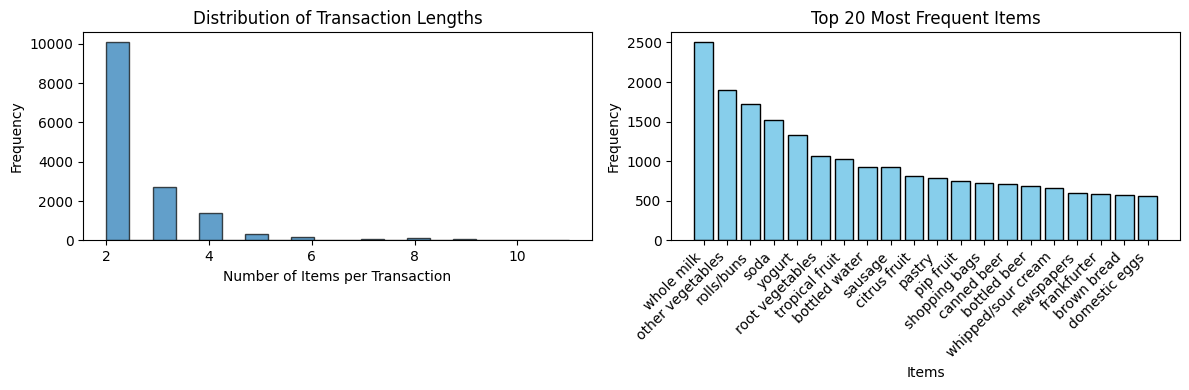


Top 10 most frequent items:
whole milk: 2502 (6.45%)
other vegetables: 1898 (4.90%)
rolls/buns: 1716 (4.43%)
soda: 1514 (3.91%)
yogurt: 1334 (3.44%)
root vegetables: 1071 (2.76%)
tropical fruit: 1032 (2.66%)
bottled water: 933 (2.41%)
sausage: 924 (2.38%)
citrus fruit: 812 (2.09%)


In [21]:
# TODO 1.3.1: Create transaction length distribution plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
# TODO: Create histogram of transaction_lengths
# Hint: plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
plt.hist(transaction_lengths, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Items per Transaction')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Lengths')

# TODO 1.3.2: Create most frequent items plot
# Step 1: Flatten all items from all transactions into one list
all_items = [item for transaction in transactions for item in transaction]

# Step 2: Count item frequencies
item_counts = Counter(all_items)
top_20_items = item_counts.most_common(20)

plt.subplot(1, 2, 2)
# TODO: Create bar plot of top 20 items
# Hint: Extract items and counts from top_20_items, then use plt.bar()
items, counts = zip(*top_20_items)

plt.bar(range(len(items)), counts, color='skyblue', edgecolor='black')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Items')
# TODO: Set x-axis labels with rotation
plt.xticks(range(len(items)), items, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# TODO 1.3.3: Print top 10 items with percentages
print("\nTop 10 most frequent items:")
# TODO: Loop through top_20_items[:10] and print item, count, and percentage
total_items = sum(item_counts.values())
for item, count in top_20_items[:10]:
    percentage = (count / total_items) * 100
    print(f"{item}: {count} ({percentage:.2f}%)")

# Part 2: Implement Apriori Algorithm Core Functions

## Calculate Support

In [22]:
def calculate_support(itemset, transactions):
    """
    Calculate support for an itemset
    Support = (Number of transactions containing itemset) / (Total number of transactions)

    TODO 2.1.1: Implement support calculation
    Args:
        itemset: frozenset of items to check
        transactions: list of transactions (lists of items)

    Returns:
        float: support value between 0 and 1

    Hints:
    - Loop through all transactions
    - Check if itemset is a subset of each transaction
    - Count how many transactions contain the itemset
    - Divide by total number of transactions
    """
    count = 0

    # TODO: Your implementation here
    # Hint: Use itemset.issubset(set(transaction)) to check containment
    for transaction in transactions:
        if itemset.issubset(set(transaction)):
            count += 1

    return count / len(transactions)

# TODO 2.1.2: Test the function
test_itemset = frozenset(['whole milk'])
support = calculate_support(test_itemset, transactions)
print(f"Support for {set(test_itemset)}: {support:.4f}")

# TODO 2.1.3: Test with a 2-itemset
test_itemset_2 = frozenset(['whole milk', 'butter'])  # Choose two items
support_2 = calculate_support(test_itemset_2, transactions)
print(f"Support for {set(test_itemset_2)}: {support_2:.4f}")


Support for {'whole milk'}: 0.1579
Support for {'butter', 'whole milk'}: 0.0047


## Generate Candidate Itemsets

In [23]:
def generate_candidates(frequent_itemsets, k):
    """
    Generate candidate itemsets of size k from frequent itemsets of size k-1
    This uses the "join" step of the Apriori algorithm

    TODO 2.2.1: Implement candidate generation
    Args:
        frequent_itemsets: set of frequent itemsets of size k-1
        k: size of candidates to generate

    Returns:
        set of candidate itemsets of size k

    Hints:
    - Convert frequent_itemsets to a list for easier iteration
    - For each pair of itemsets, compute their union
    - Only keep unions that have exactly k items
    - Use frozenset for immutable sets
    """
    candidates = set()
    frequent_list = list(frequent_itemsets)

    # TODO: Implement the join operation
    # Hint: Use nested loops to try all pairs of frequent itemsets
    # For each pair, take the union and check if it has size k
    for i in range(len(frequent_list)):
        for j in range(i + 1, len(frequent_list)):
            union_set = frequent_list[i].union(frequent_list[j])
            if len(union_set) == k:
                candidates.add(frozenset(union_set))

    return candidates

# TODO 2.2.2: Test candidate generation
frequent_1 = [frozenset(['A']), frozenset(['B']), frozenset(['C'])]
candidates_2 = generate_candidates(frequent_1, 2)
print(f"Generated 2-itemset candidates: {[set(c) for c in candidates_2]}")

# TODO 2.2.3: Test with larger example
frequent_2 = [frozenset(['A', 'B']), frozenset(['A', 'C']), frozenset(['B', 'C'])]
candidates_3 = generate_candidates(frequent_2, 3)
print(f"Generated 3-itemset candidates: {[set(c) for c in candidates_3]}")


Generated 2-itemset candidates: [{'A', 'B'}, {'C', 'B'}, {'C', 'A'}]
Generated 3-itemset candidates: [{'C', 'A', 'B'}]


## Find Frequent Itemsets (Main Apriori Algorithm)


In [24]:
def find_frequent_itemsets(transactions, min_support):
    """
    Find all frequent itemsets using the Apriori algorithm

    TODO 2.3.1: Implement the complete Apriori algorithm
    Args:
        transactions: list of transactions
        min_support: minimum support threshold

    Returns:
        dict: {k: set of frequent k-itemsets}

    Algorithm Steps:
    1. Find frequent 1-itemsets
    2. For k = 2, 3, 4, ... until no more frequent itemsets:
       a. Generate candidate k-itemsets from frequent (k-1)-itemsets
       b. Test each candidate for minimum support
       c. Keep candidates that meet minimum support
    3. Return all frequent itemsets
    """
    frequent_itemsets = {}

    # TODO 2.3.2: Find frequent 1-itemsets
    print("Finding frequent 1-itemsets...")

    # Step 1: Get all unique items
    # TODO: Fill this with all unique items from transactions
    all_items = set(item for transaction in transactions for item in transaction)

    # Step 2: Test each item for frequency
    frequent_1 = set()
    for item in all_items:
        itemset = frozenset([item])
        support = calculate_support(itemset, transactions)
        # TODO: Add to frequent_1 if support >= min_support
        if support >= min_support:
            frequent_1.add(itemset)

    frequent_itemsets[1] = frequent_1
    print(f"Found {len(frequent_1)} frequent 1-itemsets")

    # TODO 2.3.3: Generate frequent k-itemsets for k > 1
    k = 2
    while frequent_itemsets[k-1]:  # Continue while previous level has itemsets
        print(f"Finding frequent {k}-itemsets...")

        # TODO: Generate candidates using your generate_candidates function
        candidates = generate_candidates(frequent_itemsets[k-1], k)

        # TODO: Test candidates for frequency
        frequent_k = set()
        for candidate in candidates:
            # Calculate support and check against minimum
            # Add to frequent_k if it meets the threshold
            support = calculate_support(candidate, transactions)
            if support >= min_support:
                frequent_k.add(candidate)

        # TODO: Add frequent_k to results if it's not empty, otherwise break
        if not frequent_k:
            break

        frequent_itemsets[k] = frequent_k
        print(f"Found {len(frequent_k)} frequent {k}-itemsets")

        k += 1

    return frequent_itemsets

# TODO 2.3.4: Run the algorithm
min_support = 0.01  # 1% minimum support
print(f"Running Apriori with minimum support = {min_support}")
frequent_itemsets = find_frequent_itemsets(transactions, min_support)

# TODO 2.3.5: Display results summary
print(f"\nFrequent itemsets summary:")
for k, itemsets in frequent_itemsets.items():
    print(f"  {k}-itemsets: {len(itemsets)}")

# TODO 2.3.6: Show some examples of frequent itemsets
print(f"\nExample frequent itemsets:")
for k, itemsets in frequent_itemsets.items():
    if itemsets:
        example_itemsets = list(itemsets)[:3]  # Show first 3
        for itemset in example_itemsets:
            support = calculate_support(itemset, transactions)
            print(f"  {set(itemset)}: support = {support:.4f}")


Running Apriori with minimum support = 0.01
Finding frequent 1-itemsets...
Found 64 frequent 1-itemsets
Finding frequent 2-itemsets...
Found 5 frequent 2-itemsets
Finding frequent 3-itemsets...

Frequent itemsets summary:
  1-itemsets: 64
  2-itemsets: 5

Example frequent itemsets:
  {'hamburger meat'}: support = 0.0219
  {'hygiene articles'}: support = 0.0137
  {'waffles'}: support = 0.0185
  {'whole milk', 'yogurt'}: support = 0.0112
  {'other vegetables', 'rolls/buns'}: support = 0.0106
  {'whole milk', 'other vegetables'}: support = 0.0148


# Part 3: Generate Association Rules

## Task 3.1: Implement Association Rule Generation

In [25]:
def generate_association_rules(frequent_itemsets, transactions, min_confidence):
    """
    Generate association rules from frequent itemsets
    Rule: X → Y where X ∪ Y is a frequent itemset

    TODO 3.1.1: Implement association rule generation
    Args:
        frequent_itemsets: dict of frequent itemsets
        transactions: list of transactions
        min_confidence: minimum confidence threshold

    Returns:
        list of association rules with metrics

    For each frequent itemset of size ≥ 2:
    1. Generate all possible ways to split it into antecedent → consequent
    2. Calculate confidence = support(antecedent ∪ consequent) / support(antecedent)
    3. Keep rules with confidence ≥ min_confidence
    4. Calculate lift = confidence / support(consequent)
    """
    rules = []

    # TODO 3.1.2: Generate rules from itemsets of size 2 and above
    for k in range(2, len(frequent_itemsets) + 1):
        for itemset in frequent_itemsets[k]:
            items = list(itemset)

            # TODO: Generate all possible antecedent-consequent pairs
            # Hint: Use combinations to generate all possible splits
            # For itemset {A,B,C}, possible antecedents: {A}, {B}, {C}, {A,B}, {A,C}, {B,C}

            for i in range(1, len(items)):  # i is size of antecedent
                for antecedent_items in combinations(items, i):
                    antecedent = frozenset(antecedent_items)
                    consequent = itemset - antecedent

                    # TODO 3.1.3: Calculate metrics
                    support_itemset = calculate_support(itemset, transactions)
                    support_antecedent = calculate_support(antecedent, transactions)

                    if support_antecedent > 0:
                        # TODO: Calculate confidence
                        confidence = support_itemset / support_antecedent  # support_itemset / support_antecedent

                        if confidence >= min_confidence:
                            # TODO: Calculate lift
                            support_consequent = calculate_support(consequent, transactions)
                            lift = confidence / support_consequent if support_consequent > 0 else 0

                            # TODO: Add rule to results
                            rules.append({
                                'antecedent': set(antecedent),
                                'consequent': set(consequent),
                                'support': support_itemset,
                                'confidence': confidence,
                                'lift': lift
                            })

    return rules

# TODO 3.1.4: Generate rules and analyze them
min_confidence = 0.01  # 30% minimum confidence
print(f"Generating association rules with minimum confidence = {min_confidence}")

rules = generate_association_rules(frequent_itemsets, transactions, min_confidence)
print(f"Generated {len(rules)} association rules")

# TODO 3.1.5: Sort rules by confidence and display top 10
# Hint: Use rules.sort(key=lambda x: x['confidence'], reverse=True)
rules.sort(key=lambda x: x['confidence'], reverse=True)

print(f"\nTop 10 association rules by confidence:")
# TODO: Loop through top 10 rules and display them nicely
for i, rule in enumerate(rules[:10], start=1):
    ant = ', '.join(rule['antecedent'])
    cons = ', '.join(rule['consequent'])
    print(f"{i}. {{ {ant} }} => {{ {cons} }} "
          f"[support: {rule['support']:.4f}, confidence: {rule['confidence']:.2f}, lift: {rule['lift']:.2f}]")

Generating association rules with minimum confidence = 0.01
Generated 10 association rules

Top 10 association rules by confidence:
1. { yogurt } => { whole milk } [support: 0.0112, confidence: 0.13, lift: 0.82]
2. { rolls/buns } => { whole milk } [support: 0.0140, confidence: 0.13, lift: 0.80]
3. { other vegetables } => { whole milk } [support: 0.0148, confidence: 0.12, lift: 0.77]
4. { soda } => { whole milk } [support: 0.0116, confidence: 0.12, lift: 0.76]
5. { rolls/buns } => { other vegetables } [support: 0.0106, confidence: 0.10, lift: 0.79]
6. { whole milk } => { other vegetables } [support: 0.0148, confidence: 0.09, lift: 0.77]
7. { whole milk } => { rolls/buns } [support: 0.0140, confidence: 0.09, lift: 0.80]
8. { other vegetables } => { rolls/buns } [support: 0.0106, confidence: 0.09, lift: 0.79]
9. { whole milk } => { soda } [support: 0.0116, confidence: 0.07, lift: 0.76]
10. { whole milk } => { yogurt } [support: 0.0112, confidence: 0.07, lift: 0.82]


## Rule Analysis and Filtering

In [26]:
def analyze_rules(rules):
    """
    Analyze and filter association rules based on different criteria

    TODO 3.2.1: Implement comprehensive rule analysis
    """
    print("=== ASSOCIATION RULES ANALYSIS ===\n")

    # TODO 3.2.2: Rules with highest lift
    print("TOP 10 RULES BY LIFT (Most surprising associations):")
    # Sort by lift and display top 10
    # Show: antecedent → consequent, lift, confidence, support
    top_by_lift = sorted(rules, key=lambda x: x['lift'], reverse=True)[:10]
    for i, rule in enumerate(top_by_lift, 1):
        print(f"{i}. {rule['antecedent']} => {rule['consequent']} "
              f"[lift: {rule['lift']:.2f}, confidence: {rule['confidence']:.2f}, support: {rule['support']:.4f}]")

    # TODO 3.2.3: Rules with highest support
    print("\nTOP 10 RULES BY SUPPORT (Most frequent associations):")
    # Sort by support and display top 10
    top_by_support = sorted(rules, key=lambda x: x['support'], reverse=True)[:10]
    for i, rule in enumerate(top_by_support, 1):
        print(f"{i}. {rule['antecedent']} => {rule['consequent']} "
              f"[support: {rule['support']:.4f}, confidence: {rule['confidence']:.2f}, lift: {rule['lift']:.2f}]")

    # TODO 3.2.4: Balanced rules (good confidence AND lift)
    print(f"\nBALANCED RULES (Confidence > 0.5 and Lift > 1.5):")
    # Filter rules with both high confidence and high lift
    # Sort by confidence * lift product
    balanced_rules = [r for r in rules if r['confidence'] > 0.5 and r['lift'] > 1.5]
    balanced_sorted = sorted(balanced_rules, key=lambda x: x['confidence'] * x['lift'], reverse=True)

    if balanced_sorted:
        for i, rule in enumerate(balanced_sorted[:10], 1):
            print(f"{i}. {rule['antecedent']} => {rule['consequent']} "
                  f"[confidence: {rule['confidence']:.2f}, lift: {rule['lift']:.2f}, support: {rule['support']:.4f}]")
    else:
        print("No rules found with confidence > 0.5 and lift > 1.5")

    # TODO 3.2.5: Rules for specific items
    print(f"\nRULES INVOLVING 'whole milk':")
    # Find rules where 'whole milk' is either antecedent or consequent
    milk_rules = [
        r for r in rules
        if 'whole milk' in r['antecedent'] or 'whole milk' in r['consequent']
    ]

    if milk_rules:
        for i, rule in enumerate(milk_rules[:10], 1):  # limit to 10 for display
            print(f"{i}. {rule['antecedent']} => {rule['consequent']} "
                  f"[support: {rule['support']:.4f}, confidence: {rule['confidence']:.2f}, lift: {rule['lift']:.2f}]")
    else:
        print("No rules found involving 'whole milk'")

# TODO 3.2.6: Run the analysis
analyze_rules(rules)


=== ASSOCIATION RULES ANALYSIS ===

TOP 10 RULES BY LIFT (Most surprising associations):
1. {'yogurt'} => {'whole milk'} [lift: 0.82, confidence: 0.13, support: 0.0112]
2. {'whole milk'} => {'yogurt'} [lift: 0.82, confidence: 0.07, support: 0.0112]
3. {'rolls/buns'} => {'whole milk'} [lift: 0.80, confidence: 0.13, support: 0.0140]
4. {'whole milk'} => {'rolls/buns'} [lift: 0.80, confidence: 0.09, support: 0.0140]
5. {'other vegetables'} => {'rolls/buns'} [lift: 0.79, confidence: 0.09, support: 0.0106]
6. {'rolls/buns'} => {'other vegetables'} [lift: 0.79, confidence: 0.10, support: 0.0106]
7. {'other vegetables'} => {'whole milk'} [lift: 0.77, confidence: 0.12, support: 0.0148]
8. {'whole milk'} => {'other vegetables'} [lift: 0.77, confidence: 0.09, support: 0.0148]
9. {'soda'} => {'whole milk'} [lift: 0.76, confidence: 0.12, support: 0.0116]
10. {'whole milk'} => {'soda'} [lift: 0.76, confidence: 0.07, support: 0.0116]

TOP 10 RULES BY SUPPORT (Most frequent associations):
1. {'other 

# Part 4: Visualization and Business Insights

## Create Rule Visualizations

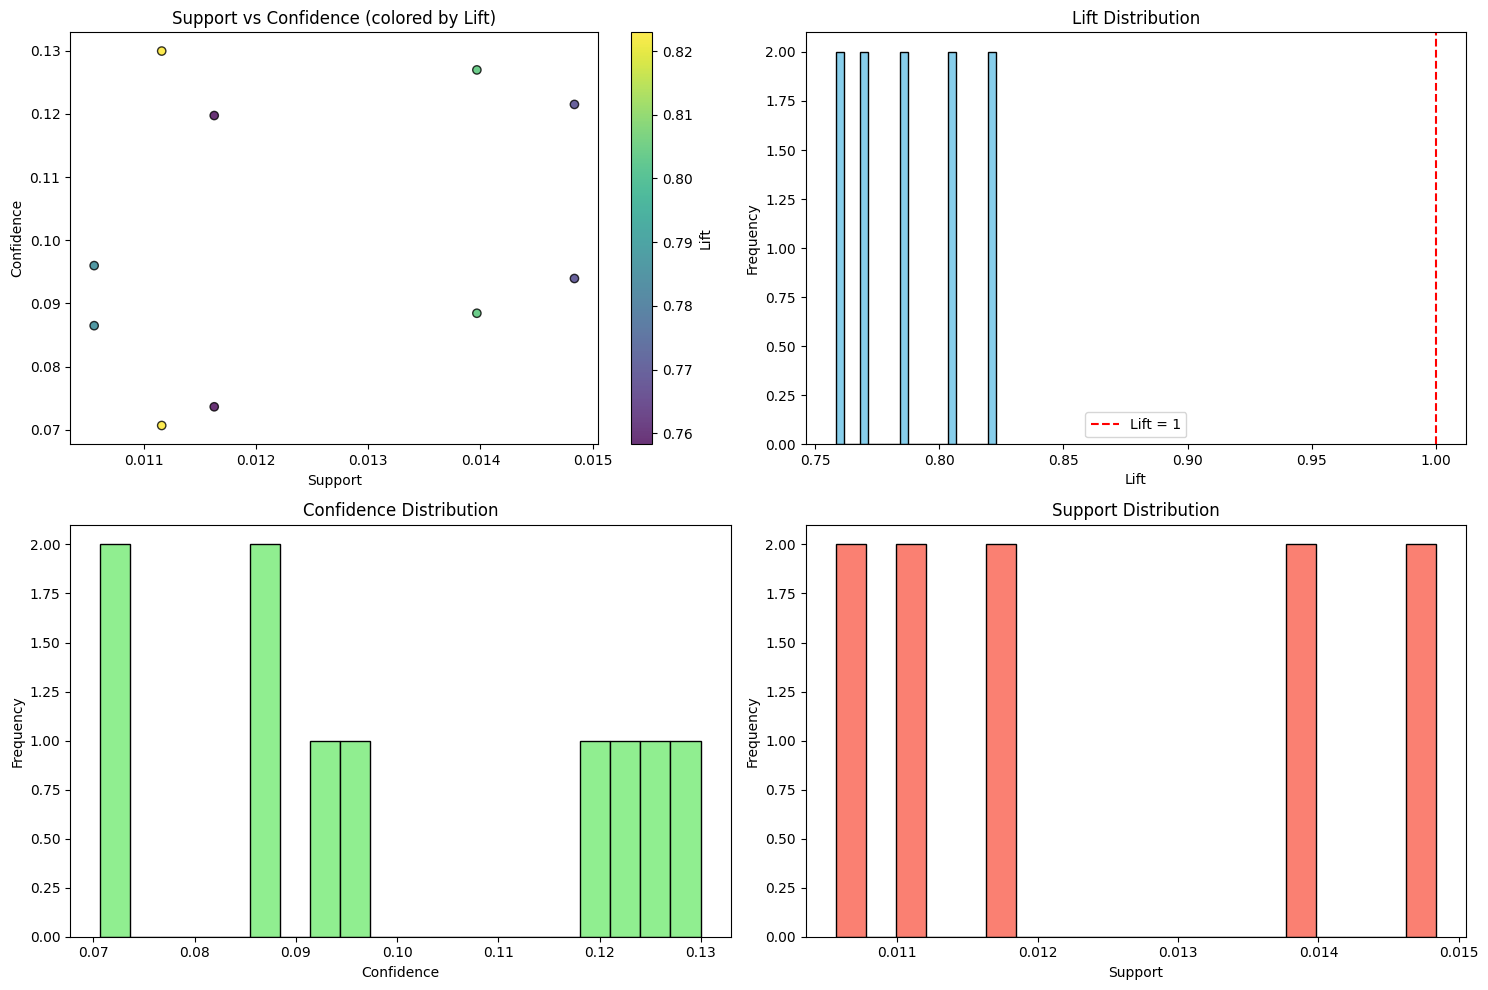

In [27]:
def visualize_rules(rules):
    """
    Create visualizations for association rules

    TODO 4.1.1: Implement rule visualizations
    """
    if not rules:
        print("No rules to visualize!")
        return

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # TODO 4.1.2: Extract metrics for plotting
    # TODO: Extract support values from rules
    supports = [r['support'] for r in rules]

    # TODO: Extract confidence values from rules
    confidences = [r['confidence'] for r in rules]

    # TODO: Extract lift values from rules
    lifts = [r['lift'] for r in rules]

    # TODO 4.1.3: Support vs Confidence scatter plot (colored by Lift)
    # Use axes[0,0].scatter() with color mapping
    sc = axes[0, 0].scatter(supports, confidences, c=lifts, cmap='viridis', edgecolor='k', alpha=0.8)
    axes[0, 0].set_title('Support vs Confidence (colored by Lift)')
    axes[0, 0].set_xlabel('Support')
    axes[0, 0].set_ylabel('Confidence')
    plt.colorbar(sc, ax=axes[0, 0], label='Lift')

    # TODO 4.1.4: Lift distribution histogram
    # Use axes[0,1].hist() and add vertical line at lift=1
    axes[0, 1].hist(lifts, bins=20, color='skyblue', edgecolor='black')
    axes[0, 1].axvline(1.0, color='red', linestyle='--', label='Lift = 1')
    axes[0, 1].set_title('Lift Distribution')
    axes[0, 1].set_xlabel('Lift')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()

    # TODO 4.1.5: Confidence distribution histogram
    # Use axes[1,0].hist()
    axes[1, 0].hist(confidences, bins=20, color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Confidence Distribution')
    axes[1, 0].set_xlabel('Confidence')
    axes[1, 0].set_ylabel('Frequency')

    # TODO 4.1.6: Support distribution histogram
    # Use axes[1,1].hist()
    axes[1, 1].hist(supports, bins=20, color='salmon', edgecolor='black')
    axes[1, 1].set_title('Support Distribution')
    axes[1, 1].set_xlabel('Support')
    axes[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# TODO 4.1.7: Create visualizations
visualize_rules(rules)


## Business Insights and Recommendations

In [29]:
def generate_business_insights(rules, transactions):
    """
    Generate actionable business insights from association rules

    TODO 4.2.1: Implement business insight generation
    """
    print("=== BUSINESS INSIGHTS AND RECOMMENDATIONS ===\n")

    # TODO 4.2.2: Cross-selling opportunities
    print("CROSS-SELLING OPPORTUNITIES:")
    print("When customers buy these items, they're likely to also buy:")
    # Find rules with high confidence (> 60%)
    # Display in user-friendly format
    cross_sell_rules = [r for r in rules if r['confidence'] > 0.6]
    if cross_sell_rules:
        for r in cross_sell_rules[:10]:
            ant = ', '.join(r['antecedent'])
            cons = ', '.join(r['consequent'])
            print(f"  → Buy '{ant}' → Recommend '{cons}' (Confidence: {r['confidence']:.2f})")
    else:
        print("  No high-confidence cross-sell rules found.")

    # TODO 4.2.3: Product bundling suggestions
    print(f"\nPRODUCT BUNDLING SUGGESTIONS:")
    print("Items frequently bought together (high support + good lift):")
    # Find rules with support > 0.02 and lift > 1.3
    # Suggest product bundles
    bundle_rules = [r for r in rules if r['support'] > 0.02 and r['lift'] > 1.3]
    if bundle_rules:
        for r in bundle_rules[:10]:
            bundle = r['antecedent'].union(r['consequent'])
            print(f"  → Bundle: {', '.join(bundle)} "
                  f"(Support: {r['support']:.3f}, Lift: {r['lift']:.2f})")
    else:
        print("  No strong bundling rules found.")

    # TODO 4.2.4: Store layout recommendations
    print(f"\nSTORE LAYOUT RECOMMENDATIONS:")
    print("Place these items near each other:")
    # Find rules with highest lift values
    # Suggest physical proximity in store
    layout_rules = sorted(rules, key=lambda r: r['lift'], reverse=True)[:10]
    if layout_rules:
        for r in layout_rules:
            print(f"  → Place near: {', '.join(r['antecedent'])} ↔ {', '.join(r['consequent'])} "
                  f"(Lift: {r['lift']:.2f})")
    else:
        print("  No strong layout recommendations found.")

    # TODO 4.2.5: Marketing insights
    print(f"\nMARKETING INSIGHTS:")
    # Find unexpected associations (high lift, moderate support)
    # Suggest promotional strategies
    marketing_rules = [r for r in rules if r['lift'] > 1.5 and 0.005 < r['support'] < 0.02]
    if marketing_rules:
        for r in marketing_rules[:10]:
            print(f"  → Promote combo: {', '.join(r['antecedent'])} + {', '.join(r['consequent'])} "
                  f"(Support: {r['support']:.3f}, Lift: {r['lift']:.2f})")
    else:
        print("  No unexpected associations found for promotions.")
# TODO 4.2.6: Generate insights
generate_business_insights(rules, transactions)


=== BUSINESS INSIGHTS AND RECOMMENDATIONS ===

CROSS-SELLING OPPORTUNITIES:
When customers buy these items, they're likely to also buy:
  No high-confidence cross-sell rules found.

PRODUCT BUNDLING SUGGESTIONS:
Items frequently bought together (high support + good lift):
  No strong bundling rules found.

STORE LAYOUT RECOMMENDATIONS:
Place these items near each other:
  → Place near: yogurt ↔ whole milk (Lift: 0.82)
  → Place near: whole milk ↔ yogurt (Lift: 0.82)
  → Place near: rolls/buns ↔ whole milk (Lift: 0.80)
  → Place near: whole milk ↔ rolls/buns (Lift: 0.80)
  → Place near: other vegetables ↔ rolls/buns (Lift: 0.79)
  → Place near: rolls/buns ↔ other vegetables (Lift: 0.79)
  → Place near: other vegetables ↔ whole milk (Lift: 0.77)
  → Place near: whole milk ↔ other vegetables (Lift: 0.77)
  → Place near: soda ↔ whole milk (Lift: 0.76)
  → Place near: whole milk ↔ soda (Lift: 0.76)

MARKETING INSIGHTS:
  No unexpected associations found for promotions.
